In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manugarri/curso_data_science/master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Procesado_de_Datos/data/vehiculos_original.csv")

In [3]:
df.head(3)

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385


In [5]:
vehiculos = df
vehiculos.dtypes

make               object
model              object
year                int64
displ             float64
cylinders         float64
trany              object
drive              object
VClass             object
fuelType           object
comb08              int64
co2TailpipeGpm    float64
dtype: object

In [6]:
vehiculos.shape

(38436, 11)

In [0]:
vehiculos = vehiculos.rename(columns={
    "cylinders":"cilindros",
    "trany":"transmision",
    "make":"fabricante",
    "model":"modelo",
    "displ":"desplazamiento", #volumen de desplazamiento del motor
    "drive":"traccion",
    "VClass":"clase",
    "fuelType":"combustible",
    "comb08":"consumo", #combined MPG for fuelType1
    "co2TailpipeGpm":"co2", # tailpipe CO2 in grams/mile
})

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) #10 pulgadas de ancho y alto

In [0]:
vehiculos['modelo_unico'] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)],sep='-')

In [18]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985                24
GMC-C15 Pickup 2WD-1984                    19
Ford-F150 Pickup 2WD-1984                  19
Chevrolet-C10 Pickup 2WD-1984              19
GMC-C15 Pickup 2WD-1985                    18
Chevrolet-S10 Pickup 2WD-1984              18
Chevrolet-C10 Pickup 2WD-1985              18
GMC-S15 Pickup 2WD-1984                    18
Chevrolet-C10 Pickup 2WD-1986              17
Ford-Ranger Pickup 2WD-1984                17
Mitsubishi-Truck 2WD-1984                  17
Dodge-Ram 50 Pickup 2WD-1984               17
GMC-C15 Pickup 2WD-1986                    17
Ford-Escort-1984                           16
Ford-Escort-1985                           16
Chevrolet-G10/20 Van 2WD-1984              16
Mercury-Lynx-1984                          16
Volkswagen-Rabbit-1984                     16
GMC-Vandura G15/25 2WD-1984                16
Ford-F150 Pickup 2WD-1985                  16
Ford-F150 Pickup 4WD-1984                  15
Volkswagen-Jetta-1984             

In [19]:
#Con esa información notamos que hay muchos repetidos
vehiculos[vehiculos.modelo_unico == 'Chevrolet-C1500 Pickup 2WD-1991'].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4960,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991


In [20]:
#Cada modelo único tiene diferentes configuraciones de cada coche (3 ó 4 velocidades)
vehiculos[vehiculos.duplicated()].shape

(1506, 12)

In [21]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

In [0]:
del vehiculos['modelo_unico']

In [23]:
n_records = len(vehiculos)
def valores_duplicados_col(df):
  for columna in df:
    n_por_valor = df[columna].value_counts()
    mas_comun = n_por_valor.iloc[0]
    menos_comun = n_por_valor.iloc[-1]
    print("{} | {}-{} | {}".format(
      df[columna].name,
      round(mas_comun / (1.0*n_records),3),
      round(menos_comun / (1.0*n_records),3),
      df[columna].dtype
    ))
valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.353-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


In [24]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

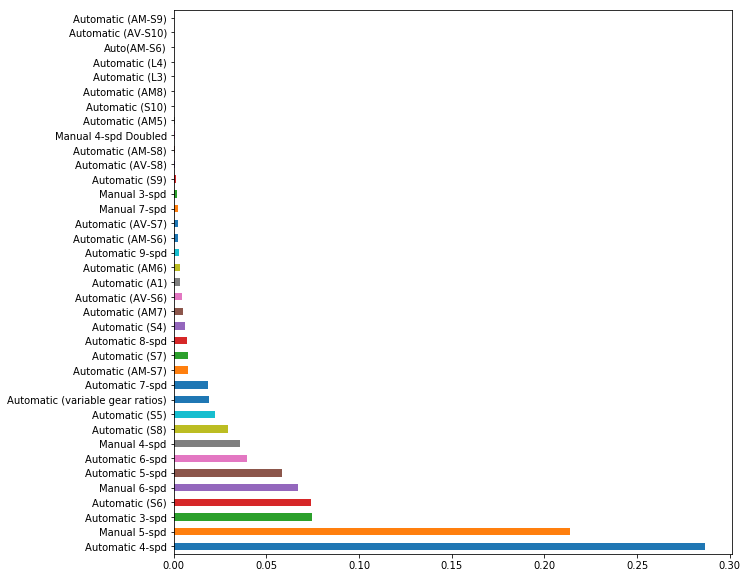

In [25]:
vehiculos.transmision.value_counts(normalize=True).plot.barh()

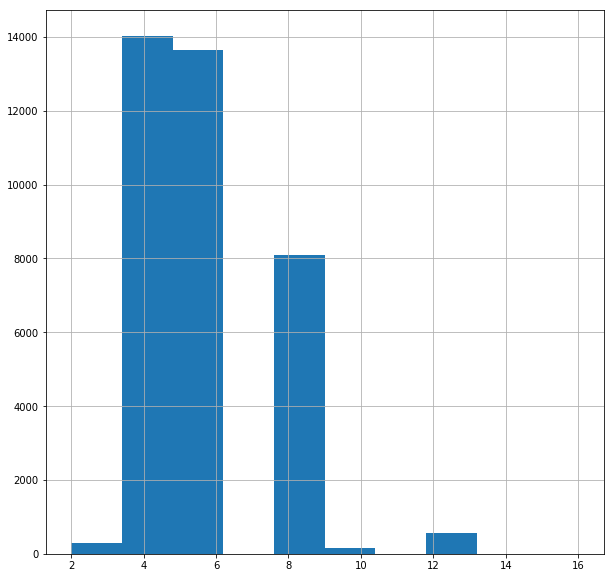

In [26]:
vehiculos.cilindros.hist()

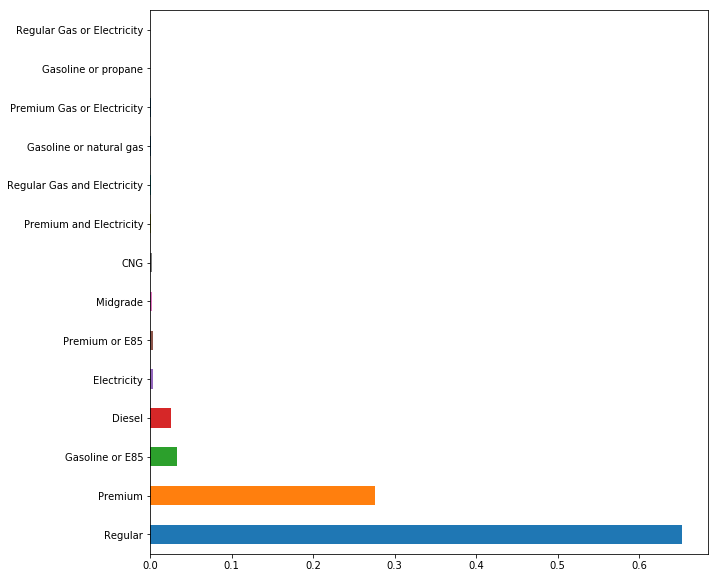

In [27]:
vehiculos.combustible.value_counts(normalize=True).plot.barh()

In [30]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
  for columna in df:
    print("{} | {} | {}".format(
      df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

El z score se define como:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [31]:
from scipy import stats
import numpy as np

def outliers_col(df):
  for columna in df:
    if vehiculos[columna].dtype != np.object:
      n_outliers = len(vehiculos[np.abs(stats.zscore(vehiculos[columna]))>3])
      print("{} | {} | {}".format(
        df[columna].name,
        n_outliers,
        df[columna].dtype))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


Se observa que las variables de consumo y co2 tienen outliers. Se puede hacer un boxplot para visualizar esto

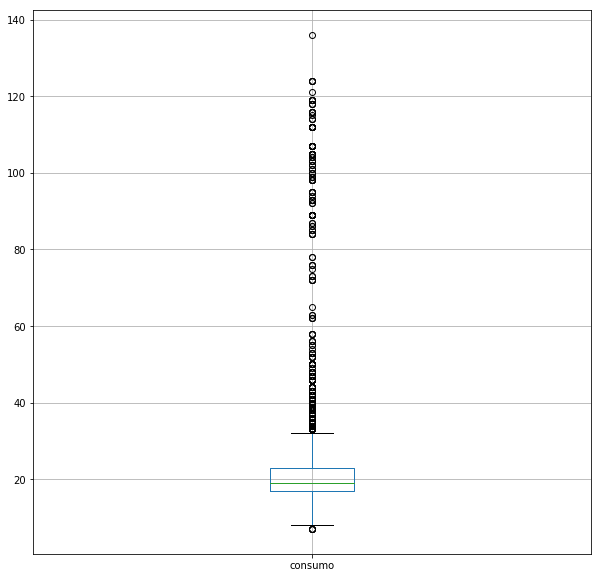

In [32]:
vehiculos.boxplot(column='consumo')

In [33]:
#Para saber si hay vehículos que usen algo que no sea gasolina
vehiculos[vehiculos.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [34]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [0]:
#Remover vehículos que no contaminan
vehiculos_no_electricos = vehiculos[vehiculos.co2>0]

In [36]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [37]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.099-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.351-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


In [40]:
def unique_col_values(df):
  for column in df:
    print("{} | {} | {}".format(
      df[column].name, len(df[column].unique()), df[column].dtype))
unique_col_values(vehiculos)

fabricante | 133 | object
modelo | 3791 | object
year | 35 | int64
desplazamiento | 67 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 14 | object
consumo | 84 | int64
co2 | 597 | float64


In [41]:
vehiculos.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [0]:
pequeno = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
medio = ['Midsize Cars']
grande = ['Large Cars']

vehiculos.loc[vehiculos['clase'].isin(pequeno), 
             'clase_tipo'] = 'Coches pequeños'

vehiculos.loc[vehiculos['clase'].isin(medio), 
             'clase_tipo'] = 'Coches Medianos'

vehiculos.loc[vehiculos['clase'].isin(grande), 
             'clase_tipo'] = 'Coches Grandes'

vehiculos.loc[vehiculos['clase'].str.contains('Truck'), 
             'clase_tipo'] = 'Camionetas'

vehiculos.loc[vehiculos['clase'].str.contains('Special Purpose'), 
             'clase_tipo'] = 'Vehículos Especiales'

vehiculos.loc[vehiculos['clase'].str.contains('Sport Utility'), 
             'clase_tipo'] = 'Deportivos'

vehiculos.loc[vehiculos['clase'].str.contains('Station'), 
             'clase_tipo'] = 'Coche Familiar'

vehiculos.loc[(vehiculos['clase'].str.lower().str.contains('van')),
             'clase_tipo'] = 'Furgoneta'

In [45]:
vehiculos.clase_tipo.dtype

CategoricalDtype(categories=['Camionetas', 'Coche Familiar', 'Coches Grandes',
                  'Coches Medianos', 'Coches pequeños', 'Deportivos',
                  'Furgoneta', 'Vehículos Especiales'],
                 ordered=False)

In [0]:
vehiculos.clase_tipo = vehiculos.clase_tipo.astype("category")

In [47]:
vehiculos.clase_tipo.value_counts()

Coches pequeños         13055
Camionetas               5446
Deportivos               5313
Coches Medianos          4274
Coche Familiar           2540
Vehículos Especiales     2216
Furgoneta                2213
Coches Grandes           1873
Name: clase_tipo, dtype: int64

In [48]:
vehiculos.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [50]:
vehiculos["traccion_tipo"] = "dos"
vehiculos["traccion_tipo"][vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "cuatro"
#Esto arrojará un warning que no afecta, para desactivarlos se usa
pd.set_option('chained_assignment',None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
#Usar loc para asignar valores en pandas
vehiculos["traccion_tipo"] = "dos"

vehiculos.loc[vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "traccion_tipo"] = "cuatro"

In [0]:
vehiculos.traccion_tipo = vehiculos.traccion_tipo.astype("category")

In [0]:
vehiculos['transmision_tipo'] = "Automatica"

vehiculos.loc[vehiculos['transmision'].str.startswith('M'),
             'transmision_tipo'] = "Manual"
#Esto arrojará resultado por NA

In [54]:
vehiculos[vehiculos['transmision'].isnull()]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo
13374,Ford,Explorer USPS Electric,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos,Automatica
13375,Ford,Explorer USPS Electric,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos,Automatica
13423,Ford,F150 Pickup 2WD,1984,5.8,8.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,11,807.909091,Camionetas,dos,Automatica
15209,Ford,Th!nk,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,65,0.000000,Coches pequeños,dos,Automatica
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,Camionetas,dos,Automatica
27984,Nissan,Altra EV,2000,NaN,NaN,NaN,NaN,Midsize Station Wagons,Electricity,85,0.000000,Coche Familiar,dos,Automatica
28202,Nissan,Hyper-Mini,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,75,0.000000,Coches pequeños,dos,Automatica
35703,Toyota,RAV4 EV,2000,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos,Automatica
35704,Toyota,RAV4 EV,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos,Automatica
35705,Toyota,RAV4 EV,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,78,0.000000,Deportivos,dos,Automatica


In [0]:
#Se usa & para filtrar mejor con más de una opción
vehiculos['transmision_tipo'] = "Automatica"
vehiculos['transmision_tipo'][
    (vehiculos['transmision'].notnull()) & (vehiculos['transmision'].str.startswith('M'))
] = "Manual"
vehiculos.transmision_tipo = vehiculos.transmision_tipo.astype("category")

In [58]:
vehiculos.transmision_tipo.value_counts()

Automatica    25076
Manual        11854
Name: transmision_tipo, dtype: int64

In [59]:
vehiculos.combustible.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Regular Gas and Electricity       20
Gasoline or natural gas           20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [0]:
vehiculos['combustible_tipo'] = 'Otros tipos de combustible'
vehiculos.loc[vehiculos['combustible']=='Regular',
             'combustible_tipo'] = 'Normal'
vehiculos.loc[vehiculos['combustible']=='Premium',
             'combustible_tipo'] = 'Premium'

vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'),
             'combustible_tipo'] = 'Hibrido'

In [62]:
vehiculos.combustible_tipo = vehiculos.combustible_tipo.astype("category")
vehiculos.combustible_tipo.value_counts()

Normal                        24078
Premium                       10206
Otros tipos de combustible     2437
Hibrido                         209
Name: combustible_tipo, dtype: int64

Continuar desde el 26 <br>
https://github.com/manugarri/curso_data_science/blob/master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Analisis_Exploratorio_de_Datos/notebooks/Analisis%20Exploratorio%20de%20Datos%20-%203.%20Agrupacion%20de%20variables.ipynb